# **Dean Loeafoe Project 1**
## **Part 1 - Introduction**
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. As of 2015, 30.3 million people in the United States, or 9.4 percent of the population, had diabetes. More than 1 in 4 of them didn’t know they had the disease. Diabetes affects 1 in 4 people over the age of 65. About 90-95 percent of cases in adults are type 2 diabetes.\

Due to the prevalence of this disease, it is more than worthwhile to see if there is a way to predict the occurrence of diabetes in an attempt to prevent it prophylactically.

### **Statement of Problem**
Is it possible to create a model that predicts the occurence of diabetes when given certain metrics?

## **Part 2 - Data Summary**
* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration at 2 hour in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mmHg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2 hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2
* DiabetesPedigreeFunction - Indicates the function which scores likelihood of diabetes based on family history
* Age - Age of this patient in years
* Outcome - Does this patient have diabetes or not?

In [107]:
#Initialize data
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/espio11/Data-Analytics-Summer-2022/main/diabetes", sep = "\t")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
df.tail() #Confirming the remaining 1310 rows are in the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [109]:
df.describe() #A look at the statistics of the attributes before any alterations are made

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Part 3: Data preparation**
In this section, I will search for and handle any values that are unexpected or do not provide information to the data set.

In [110]:
#check how many values are null in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values detected. In the next section of Data preparation, I will check for any other odd values that remain such as quesion marks or negative numbers in places where they should not exist.

In [113]:
#Pregnancies
temp =  df['Pregnancies'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

In [114]:
#Glucose
temp =  df['Glucose'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199])

In [115]:
#It's odd to see patients with a 0 for their Glucose rating
#I will assume this is inaccurate informaition
#These rows will be dropped
df = df[df.Glucose != 0]

In [116]:
#Confirm there are no 0 values
temp =  df['Glucose'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194,
       195, 196, 197, 198, 199])

In [117]:
#Checking if the number of rows has gone down after the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    int64  
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


In [118]:
#BloodPressure
temp =  df['BloodPressure'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122])

In [119]:
#It's odd to see patients with a 0 for their blood pressure
#I will assume this is inaccurate informaition
#These rows will be dropped
df = df[df.BloodPressure != 0]

In [120]:
#Confirm there are no 0 values
temp =  df['BloodPressure'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,  58,
        60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,  78,
        80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98, 100,
       102, 104, 106, 108, 110, 114, 122])

In [121]:
#Checking if the number of rows has gone down after the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    int64  
 1   Glucose                   728 non-null    int64  
 2   BloodPressure             728 non-null    int64  
 3   SkinThickness             728 non-null    int64  
 4   Insulin                   728 non-null    int64  
 5   BMI                       728 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       728 non-null    int64  
 8   Outcome                   728 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.9 KB


In [122]:
#SkinThickness
temp =  df['SkinThickness'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

In [123]:
#It's odd to see patients with a 0mm for their skin thickness
#I will assume this is inaccurate informaition
#These rows will be dropped
df = df[df.SkinThickness != 0]

In [124]:
#Confirm there are no 0 values
temp =  df['SkinThickness'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

In [125]:
#Checking if the number of rows has gone down after the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               534 non-null    int64  
 1   Glucose                   534 non-null    int64  
 2   BloodPressure             534 non-null    int64  
 3   SkinThickness             534 non-null    int64  
 4   Insulin                   534 non-null    int64  
 5   BMI                       534 non-null    float64
 6   DiabetesPedigreeFunction  534 non-null    float64
 7   Age                       534 non-null    int64  
 8   Outcome                   534 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.7 KB


In [126]:
#Insulin
temp =  df['Insulin'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [127]:
#It's odd to see patients with a 0 for their insulin rating
#I will assume this is inaccurate informaition
#These rows will be dropped
df = df[df.Insulin != 0]

In [128]:
#Confirm there are no 0 values
temp =  df['Insulin'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,  40,
        41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  99,
       100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122, 125,
       126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146, 148,
       150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170, 171,
       175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192, 193,
       194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230, 231,
       235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272, 274,
       275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318, 321,
       325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415,
       440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 545, 57

In [129]:
#Checking if the number of rows has gone down after the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Glucose                   393 non-null    int64  
 2   BloodPressure             393 non-null    int64  
 3   SkinThickness             393 non-null    int64  
 4   Insulin                   393 non-null    int64  
 5   BMI                       393 non-null    float64
 6   DiabetesPedigreeFunction  393 non-null    float64
 7   Age                       393 non-null    int64  
 8   Outcome                   393 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.7 KB


In [130]:
#BMI
temp =  df['BMI'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 0. , 18.2, 19.3, 19.4, 19.5, 19.6, 20.1, 20.4, 20.8, 21.1, 21.2,
       21.8, 22.1, 22.2, 22.3, 22.9, 23.1, 23.2, 23.4, 23.6, 23.7, 23.8,
       23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.6, 24.7, 24.8, 25. , 25.1,
       25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.6, 26.8, 26.9, 27.1, 27.2, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. ,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.2, 32.4, 32.5, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.6, 33.7,
       33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8,
       34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.7, 35.8, 35.9, 36.1,
       36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37.1, 37.2,
       37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.2, 38.4, 38.5,
       38.6, 38.7, 38.9, 39. , 39.1, 39.2, 39.3, 39

In [131]:
#It's odd to see patients with a 0 for their BMI rating
#I will assume this is inaccurate informaition
#These rows will be dropped
df = df[df.BMI != 0]

In [132]:
#Confirm there are no 0 values
temp =  df['BMI'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([18.2, 19.3, 19.4, 19.5, 19.6, 20.1, 20.4, 20.8, 21.1, 21.2, 21.8,
       22.1, 22.2, 22.3, 22.9, 23.1, 23.2, 23.4, 23.6, 23.7, 23.8, 23.9,
       24. , 24.1, 24.2, 24.3, 24.4, 24.6, 24.7, 24.8, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4,
       26.6, 26.8, 26.9, 27.1, 27.2, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9,
       28. , 28.1, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.3,
       29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5,
       30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. , 32.2,
       32.4, 32.5, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.6, 33.7, 33.8,
       33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9,
       35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.7, 35.8, 35.9, 36.1, 36.2,
       36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37.1, 37.2, 37.4,
       37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.2, 38.4, 38.5, 38.6,
       38.7, 38.9, 39. , 39.1, 39.2, 39.3, 39.4, 39

In [133]:
#Checking if the number of rows has gone down after the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [134]:
#DiabetesPedigreeFunction
temp =  df['DiabetesPedigreeFunction'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0.085, 0.088, 0.089, 0.101, 0.107, 0.115, 0.118, 0.122, 0.123,
       0.127, 0.128, 0.134, 0.138, 0.142, 0.143, 0.149, 0.15 , 0.153,
       0.154, 0.155, 0.156, 0.158, 0.159, 0.16 , 0.161, 0.162, 0.163,
       0.164, 0.165, 0.166, 0.167, 0.171, 0.173, 0.175, 0.176, 0.183,
       0.187, 0.189, 0.192, 0.198, 0.199, 0.203, 0.204, 0.205, 0.207,
       0.215, 0.217, 0.219, 0.221, 0.222, 0.223, 0.225, 0.229, 0.23 ,
       0.231, 0.233, 0.234, 0.235, 0.237, 0.238, 0.24 , 0.245, 0.246,
       0.247, 0.248, 0.249, 0.251, 0.254, 0.255, 0.256, 0.257, 0.258,
       0.259, 0.26 , 0.261, 0.262, 0.263, 0.264, 0.267, 0.268, 0.269,
       0.27 , 0.271, 0.279, 0.28 , 0.282, 0.283, 0.284, 0.285, 0.286,
       0.287, 0.289, 0.292, 0.293, 0.295, 0.299, 0.305, 0.306, 0.313,
       0.314, 0.315, 0.318, 0.319, 0.323, 0.324, 0.325, 0.326, 0.328,
       0.329, 0.33 , 0.332, 0.334, 0.335, 0.336, 0.337, 0.338, 0.34 ,
       0.341, 0.342, 0.344, 0.347, 0.349, 0.352, 0.356, 0.361, 0.362,
       0.364, 0.365,

In [135]:
#Age
temp =  df['Age'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 63, 81])

In [136]:
#Outcome
temp =  df['Outcome'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0, 1])

In [147]:
df.describe() #A look at the statistics of the attributes after all the changes have been made

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Part 4 - Data Visualization**

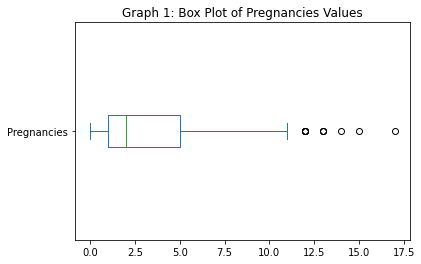

In [137]:
plt.title('Graph 1: Box Plot of Pregnancies Values')
df['Pregnancies'].plot(kind='box', vert=False);

The values of the pregnancies attributes if skew to the right since there is a significant number of patients who've had a number of pregnancies that are higher than the median. This isn't too odd since every sample population has it's own idiosyncrasies. There are  outliers outside the standard deviation which isn't terribly peculiar since a few of the patients will have a high number of pregnancies comparatively.

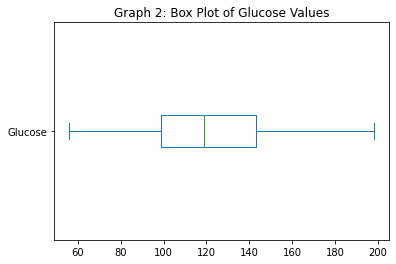

In [138]:
plt.title('Graph 2: Box Plot of Glucose Values')
df['Glucose'].plot(kind='box', vert=False);

There isn't anything too odd about the Glucose boxplot. The values are slightly skewed right but that is perfectly fine. There are no outliers.

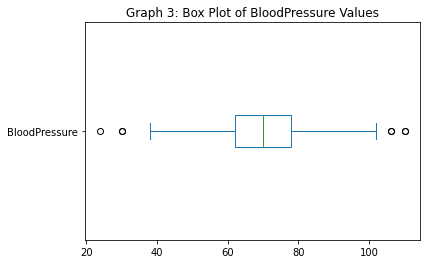

In [139]:
plt.title('Graph 3: Box Plot of BloodPressure Values')
df['BloodPressure'].plot(kind='box', vert=False);

BloodPressure has a fairly even distribution. There are a few outliers at each end of the graph which is to be expected.

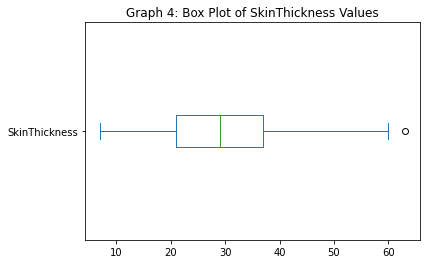

In [140]:
plt.title('Graph 4: Box Plot of SkinThickness Values')
df['SkinThickness'].plot(kind='box', vert=False);

The values of SkinThickness are evenly distributed for the most part. There is one outlier near the max value. This isn't too odd since there are bound to be individuals with thicker skin.

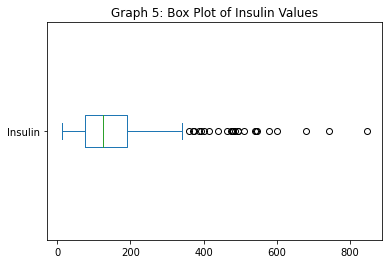

In [141]:
plt.title('Graph 5: Box Plot of Insulin Values')
df['Insulin'].plot(kind='box', vert=False);

There is a large number of outliers on the higher end of the graph. This might be due to the high number of diabetics in the sample population.

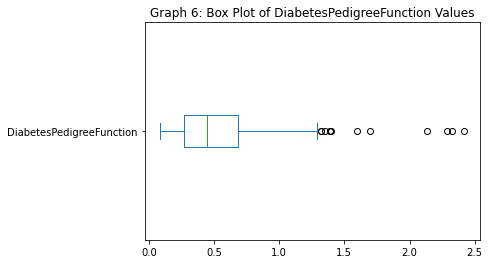

In [142]:
plt.title('Graph 6: Box Plot of DiabetesPedigreeFunction Values')
df['DiabetesPedigreeFunction'].plot(kind='box', vert=False);

There are a few outliers on the upper end of the graph. Just like the previous graph, this might be due to the large number of diabetics in the sample population.

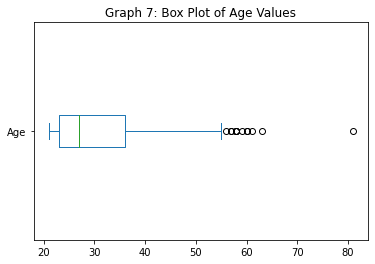

In [143]:
plt.title('Graph 7: Box Plot of Age Values')
df['Age'].plot(kind='box', vert=False);

The values of this graph are skewed right with a few outliers at the upper end. This might be due to the fact that one is more likely to get diabetes as they age.

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

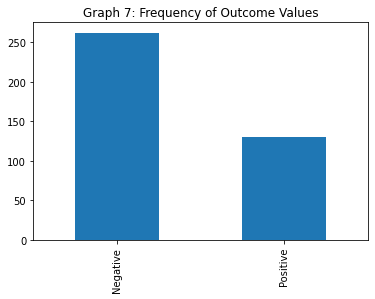

In [146]:
bplt = df['Outcome'].value_counts().plot.bar(title = "Graph 7: Frequency of Outcome Values")
bplt.set_xticklabels(["Negative","Positive"])

About 2/3 of the sample population has diabetes while about 1/3 is positive for the disease.

In [148]:
#Display numerical representation of correlation between numerical attributes
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


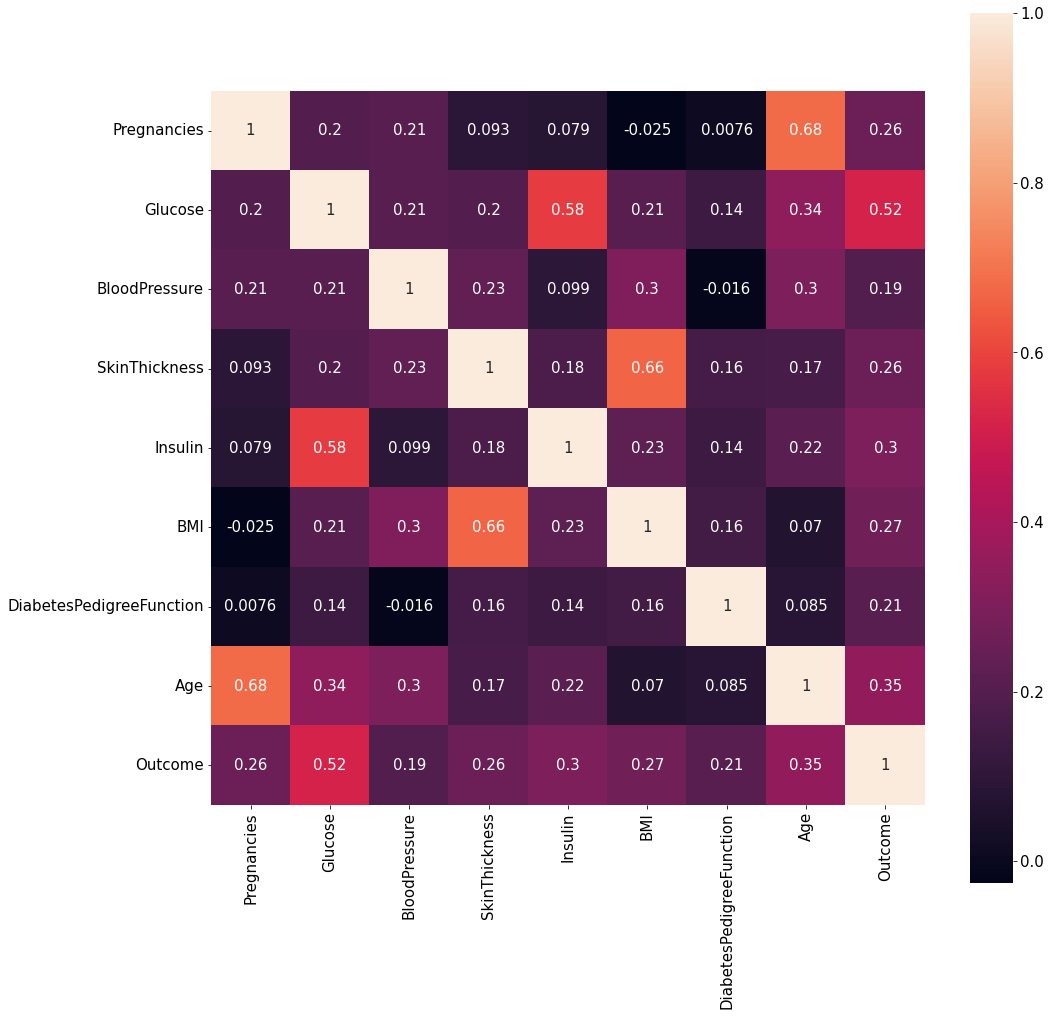

In [152]:
corr = df.corr()
plt.rcParams.update({'font.size': 15,'figure.figsize':(16,16)})
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

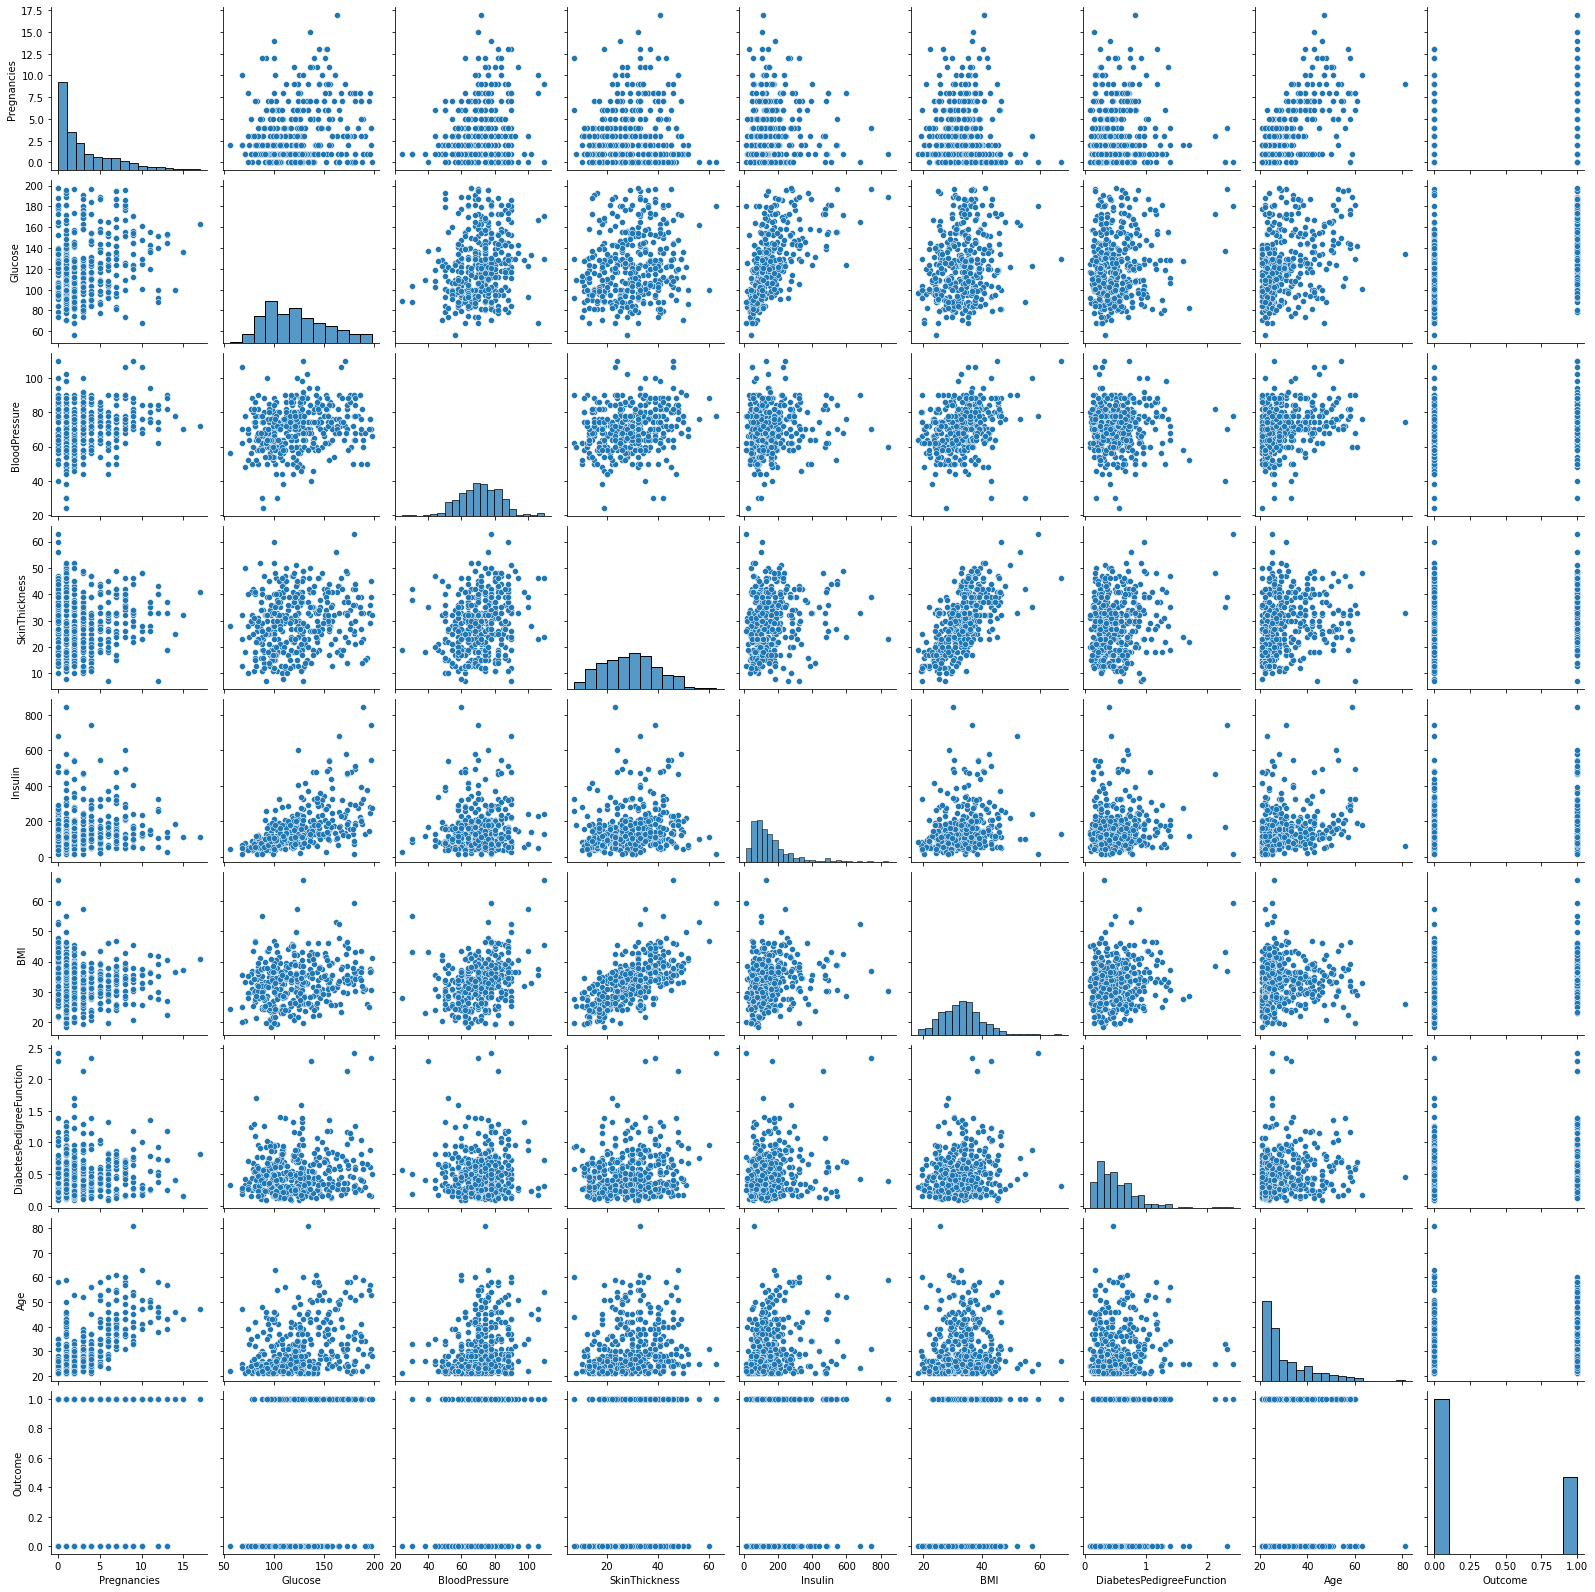

In [150]:
#Display graphical representation of correlation between numerical attributes
sns.pairplot(data=df)

### **Preliminary Conclusion**
Interestingly enough, the values provided by the pair plot graphs and heat map align very closely with what we hear from medical professionals in real life. The 3 attributes that have the highest amount of correlation with the outcome attribute are Glucose, Age and BMI. Medical professionals always tell us that there is an increased risk of contracting diabetes with the increase of age, weight and blood sugar. These correlation values should come at no surprise. I fully expect these three attributes to be a part of any model built from attributes selected in fature selection.

There are also some attributes that show a decent amount of colinearity. Age and Pregnancies, Insulin and Glucose as well as BMI and SkinThickness have correlation values of .68, .58 and .66 respectively. These correlations should not come as a surprice since each pair of attributes are biologically linked to each other. Both pregnant women and individuals of advanced age regularly experiecnce complications in regulating their blood sugar. One's level of insulin is responsible for their ability to absorb and regulate their blood sugar (glucose). One's skin thickness often increses with their BMI. None of this should come as a surprise. Once the models are formed, I expect the attribute with the lower correlation value to the Outcome attribute to be dropped during feature selection.

## **Part 5a: K-Best Feature Selection**
In the next section, I will use K-best and a Chi Squared test to select features for 2 different models.

In [154]:
#K-Best feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = df['Outcome']
features = df.drop('Outcome',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", df.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

Chosen features:  Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object') 



array([ 27.48115175, 141.29845713,  15.03615248,  27.33684065,
        38.97663429,  30.69561604,  17.87250157,  54.72993747])

In [155]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

        Chosen
0  Pregnancies
1      Glucose
2      Insulin
3          BMI
4          Age


## **Part 5b: Chi-Square Feature Selection**

In [156]:
#Chi-Square feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df.drop('Outcome',1)
y = df['Outcome']

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [157]:
feature_score = pd.DataFrame()

for i in range(X.shape[1]):
    new = pd.DataFrame({'Features' : X.columns[i],
                        'Score' : fit.scores_[i]}, index=[i])
    
    feature_score = pd.concat([feature_score, new])

In [158]:
#The 5 attributes with the higest scores will be selected
feature_score

,Features,Score
0,Pregnancies,80.412215
1,Glucose,807.609432
2,BloodPressure,32.075570
3,SkinThickness,97.186150
4,Insulin,3215.172502
5,BMI,42.585260
6,DiabetesPedigreeFunction,3.909884
7,Age,162.221496


## **Part 6.1 - Logistic Regression Model from Original Data**

In [159]:
#Form model1 from all of the attributes in the original dataframe
y, X = dmatrices('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model1 = LogisticRegression()
model1 = model1.fit(X, y)
model1.score(X, y) #Score of model1

0.7882653061224489

In [160]:
y.mean() #Percentage of patients with diabetes

0.33163265306122447

In [161]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [162]:
#Use model to make predictions for Outcome
predicted = model1.predict(X_test)
probs = model1.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions1'] = predicted

filtered_dt = dt[dt['predictions1'] == 1]
filtered_dt

,0,1,predictions1
1,0.204749,0.795251,1.0
5,0.359768,0.640232,1.0
8,0.216316,0.783684,1.0
9,0.311402,0.688598,1.0
35,0.215545,0.784455,1.0
40,0.177530,0.822470,1.0
42,0.480966,0.519034,1.0
47,0.411603,0.588397,1.0
49,0.312530,0.687470,1.0
51,0.450237,0.549763,1.0


In [163]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7959183673469388
Roc: 0.8414918414918414


In [164]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[61  4]
 [16 17]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        65
         1.0       0.81      0.52      0.63        33

    accuracy                           0.80        98
   macro avg       0.80      0.73      0.74        98
weighted avg       0.80      0.80      0.78        98



## **Part 6.2 - Logistic Regression Model from Attributes with High Correlation**

In [165]:
#Form model2 from all of the attributes in the original dataframe
y, X = dmatrices('Outcome ~ Pregnancies + SkinThickness + BMI  + Age + Glucose', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model2 = LogisticRegression()
model2 = model2.fit(X, y)
model2.score(X, y) #Score of model2

0.7882653061224489

In [167]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [168]:
#Use model to make preictions of Outcome
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions2'] = predicted

filtered_dt = dt[dt['predictions2'] == 1]
filtered_dt

,0,1,predictions2
1,0.140556,0.859444,1.0
5,0.417236,0.582764,1.0
8,0.280548,0.719452,1.0
9,0.337711,0.662289,1.0
25,0.422873,0.577127,1.0
35,0.167183,0.832817,1.0
40,0.461619,0.538381,1.0
42,0.411860,0.588140,1.0
47,0.275639,0.724361,1.0
48,0.494596,0.505404,1.0


In [169]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7959183673469388
Roc: 0.8517482517482518


In [170]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[60  5]
 [15 18]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        65
         1.0       0.78      0.55      0.64        33

    accuracy                           0.80        98
   macro avg       0.79      0.73      0.75        98
weighted avg       0.79      0.80      0.78        98



## **Part 6.3 - Logistic Regression Model from Attributes selected with K-Best**

In [171]:
#Form model3 from all of the attributes in the original dataframe
y, X = dmatrices('Outcome ~ Pregnancies + Glucose + Insulin + BMI + Age', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model3 = LogisticRegression()
model3 = model3.fit(X, y)
model3.score(X, y) #Score of model3

0.7831632653061225

In [172]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [173]:
#Use model to make preictions of Outcome
predicted = model3.predict(X_test)
probs = model3.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions3'] = predicted

filtered_dt = dt[dt['predictions3'] == 1]
filtered_dt

,0,1,predictions3
1,0.137355,0.862645,1.0
5,0.443184,0.556816,1.0
8,0.229455,0.770545,1.0
9,0.357221,0.642779,1.0
25,0.363839,0.636161,1.0
35,0.208266,0.791734,1.0
40,0.411110,0.588890,1.0
42,0.328266,0.671734,1.0
47,0.453917,0.546083,1.0
49,0.429698,0.570302,1.0


In [174]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.8061224489795918
Roc: 0.8564102564102564


In [175]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[61  4]
 [15 18]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.80      0.94      0.87        65
         1.0       0.82      0.55      0.65        33

    accuracy                           0.81        98
   macro avg       0.81      0.74      0.76        98
weighted avg       0.81      0.81      0.79        98



## **Part 6.4 - Logistic Regression Model from Attributes selected with Chi Square**

In [181]:
#Form model4 from all of the attributes in the original dataframe
y, X = dmatrices('Outcome ~ Pregnancies + Glucose + Insulin + Age', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model4 = LogisticRegression()
model4 = model4.fit(X, y)
model4.score(X, y) #Score of model4

0.7831632653061225

In [182]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model4 = LogisticRegression()
model4.fit(X_train, y_train)

LogisticRegression()

In [183]:
#Use model to make predictions for Outcome
predicted = model4.predict(X_test)
probs = model4.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions4'] = predicted

filtered_dt = dt[dt['predictions4'] == 1]
filtered_dt

,0,1,predictions4
1,0.147059,0.852941,1.0
5,0.359307,0.640693,1.0
8,0.249356,0.750644,1.0
9,0.275322,0.724678,1.0
25,0.492882,0.507118,1.0
34,0.465266,0.534734,1.0
35,0.250364,0.749636,1.0
42,0.405599,0.594401,1.0
43,0.410095,0.589905,1.0
47,0.449550,0.550450,1.0


In [184]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7755102040816326
Roc: 0.8419580419580419


In [185]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[59  6]
 [16 17]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.79      0.91      0.84        65
         1.0       0.74      0.52      0.61        33

    accuracy                           0.78        98
   macro avg       0.76      0.71      0.72        98
weighted avg       0.77      0.78      0.76        98



## **Model Selection**
Each of the 4 model perform similarly. They produced metrics that were similar between them. As expected, the Glucose and Age attributes got selected for each of the 3 models that were built from selected features. Surprisingly, the Pregnancies attribute was also selected to be a part of all 3 of the models with selected features. The other 2 attributes was always some combination of BMI, Insulin and SkinThickness. This was somewhat unexpected because I predicted that the SkinThickness and Insulin attributes would not be selected due to their colinearity with BMI and Glucose respectively, both of which have a higher degree of correlation with the Outcome attribute.

In the end, I select Model 4. That is the model built from features selected with Chi Square. Model 4 has a slightly lower model score than Models 1 and 2. Despite this, Model 4 has a slightly higher accuracy, ROC, precision, recall and F! score. Overall, I believe this model is the best choice.

## **References**
https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes#:~:text=Diabetes%20is%20a%20disease%20that,to%20be%20used%20for%20energy

https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/#:~:text=Diabetes%20Pedigree%20Function%3A%20indicates%20the,%3D%20yes%2C%200%20%3D%20no)